# Computational Quantum Mechanics Basics: Nonlinear Systems
## Gross–Pitaevskii equation - nonlinear Schrödinger equation

$$ \frac{\partial \phi}{\partial t} = -i (-\frac{\hbar^2}{2m}\frac{\partial}{\partial x}+V(x)+g|\phi(x)|^2+...) \phi $$


In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize as spopt

L = 30.0
R = 1024*4
X = np.linspace(-L/2,L/2,R,endpoint=False)
ksi = np.exp(1j*X*(2*np.pi/L))
dX = L/R

def norm(phi):
	return np.sqrt(np.sum(np.abs(phi)**2)*dX)



In [3]:
f = np.fft.fftfreq(R,dX)
p = 2*np.pi*f
K2 = (2.0*np.pi*np.pi)*f*f

def drift(phi_x,T):
	phi_k = np.fft.fft(phi_x)
	phi_k *= np.exp(-1j*T*K2)
	return np.fft.ifft(phi_k)

In [4]:
def int_pot_int(phi,g,V,T):
	sgn = -1j
	a = np.abs(phi)
	n = a**2
	m = a**3
	hT = 0.5*T
	phi_h = np.exp(sgn*(g[0]*n+g[1]*m+V)*hT)*phi
	a = np.abs(phi_h)
	n = a**2
	m = a**3
	return np.exp(sgn*(g[0]*n+g[1]*m+V)*T)*phi

## Inaginary time integration

In [22]:
DTs = [
	(-0.001j,10000),
]

def integrate(phi_T,N,g):
    for DT, count in DTs:
        for idx in range(count):
            phi_T = drift(phi_T,DT)
            phi_T *= np.sqrt(N)/norm(phi_T)
            phi_T = int_pot_int(phi_T,g,V,DT)
            phi_T *= np.sqrt(N)/norm(phi_T)
    return phi_T


## Interacting bosons in a harmonic trap

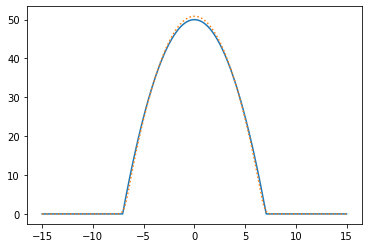

In [16]:
V = X**2
mu = 50
g = 1.0
# Thomas–Fermi approximation
phi_0 = np.sqrt(np.maximum((mu-V)/g,np.zeros_like(X)))
N = norm(phi_0)**2

phi_T = integrate(phi_0,N,[g,0])

plt.plot(X,np.abs(phi_0)**2)
plt.plot(X,np.abs(phi_T)**2,ls=":")

## Dark solitons

[1.06617227 0.63788152]


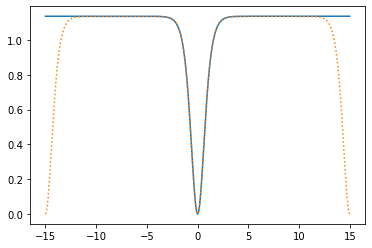

In [17]:
N = 1.0*L
g = 1.0
V = 0
phi_0 = np.ones_like(X)
phi_0[X<0] *= -1

phi_T = integrate(phi_0,N,[g,0])

fit_mask = np.abs(X)<L/4
fit_x = X[fit_mask]
fit_y = phi_T[fit_mask].real

def dark_soliton(x,a,b):
	return a*np.tanh(x/(np.sqrt(2)*b))

popt, pcov = spopt.curve_fit(dark_soliton,fit_x,fit_y)
print(popt)

plt.plot(X,np.abs(dark_soliton(X,*popt))**2)
plt.plot(X,np.abs(phi_T)**2,ls=":")

## Quasi-1D quantum droplet

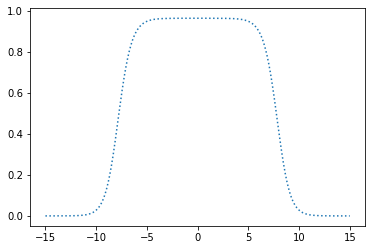

In [23]:
N = 0.5*L
g = [-2.34375,1.953125]
V = 0
phi_0 = np.cos(1.0*np.pi*X/L)

phi_T = integrate(phi_0,N,g)


plt.plot(X,np.abs(phi_T)**2,ls=":")

# Task

Play with parameters in the examples above. Can you make the convergence process faster?